In [1]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/7_1-1.las')
df = las.df()
df.tail()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
2815.1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430444,1.138537,1.139098,19.852074,NaN,NaN,NaN,NaN,NaN,2815.104736,450379.40625,6406641.0,-2780.967529
2815.2568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510404,1.138337,1.139497,20.274757,NaN,NaN,NaN,NaN,NaN,2815.256836,450379.40625,6406641.0,-2781.119629
2815.4088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.591403,1.138057,1.138816,20.716501,NaN,NaN,NaN,NaN,NaN,2815.408691,450379.40625,6406641.0,-2781.271484
2815.5608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815.7128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.134880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 30000., 65000., 65030., 70000., 99000., 80000., 70032.])

In [4]:
df_filled = df.fillna(0)

In [5]:
df_filled.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
82.6008,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82.7528,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82.9048,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83.0568,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83.2088,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_filled = df_filled.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'X_LOC', 'Y_LOC', 'Z_LOC'], axis=1)

In [9]:
df_filled.columns

Index(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'BS', 'DCAL', 'MUDWEIGHT',
       'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB',
       'DRHO', 'DEPTH_MD'],
      dtype='object')

In [18]:
columns = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

# Apply normalization to selected columns
df_normalized = df_filled[columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Concatenate the normalized columns with the remaining columns
# df_normalized = pd.concat([df_normalized, df_filled.drop(columns, axis=1)], axis=1)

df_normalized.head()


,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO
DEPT,,,,,,,,,,,,,
82.6008,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
82.7528,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
82.9048,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
83.0568,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
83.2088,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537


In [69]:
X = df_normalized
y = df_filled['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [70]:
y.head()

DEPT
82.6008    0.0
82.7528    0.0
82.9048    0.0
83.0568    0.0
83.2088    0.0
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: float64

In [71]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,
                 0: 12}

In [72]:
y = y.map(lithology_numbers)

In [73]:
y.head()

DEPT
82.6008    12
82.7528    12
82.9048    12
83.0568    12
83.2088    12
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [74]:
X = X.transpose()


In [79]:
# Reshape the DataFrame
M = len(X)
N = len(X.columns)
K = 1

data = X.to_numpy()

# Reshape the data into a 3D tensor
input_tensor = np.reshape(data, (N, M, K))
print(input_tensor)

[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.21006669]
  [0.1914343 ]
  [0.16181272]
  ...
  [0.23176273]
  [0.22757643]
  [0.21450621]]

 [[0.20069239]
  [0.26953749]
  [0.26953749]
  ...
  [0.26953749]
  [0.26953749]
  [0.26953749]]

 [[0.26953749]
  [0.26953749]
  [0.26953749]
  ...
  [0.26953749]
  [0.26953749]
  [0.26953749]]]


In [76]:
np.save('input_data.npy', input_tensor)

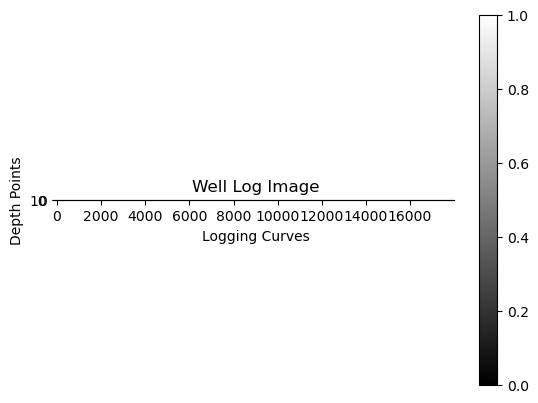

In [78]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the well log
im = ax.imshow(input_tensor[:, :, 0], cmap='jet', aspect='auto')

# Customize the plot
ax.set_title('Well Log')
ax.set_xlabel('Depth')
ax.set_ylabel('Logging Curve')
cbar = fig.colorbar(im, ax=ax, label='Value')

# Show the plot
plt.show()
